In [2]:
from simply_nwb.pipeline import NWBSession
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
foldername = "C:\\Users\\minjarec\\OneDrive - The University of Colorado Denver\\Documents\\predict_nwbs"
filename = "predictive-20231104_unitME_session001-nwb-4-24_13-28-7_putative.nwb"
fullpath = os.path.join(foldername, filename)

#foldername = "C:\\Users\\minjarec\\OneDrive - The University of Colorado Denver\\Documents\\predict_nwbs"
#filename = "predictive-20231103_unitME_session001-nwb-4-24_13-28-6_putative.nwb"
#fullpath = os.path.join(foldername, filename)

#foldername = "Z:\\AnneData\\incorrect_predict_nwbs"
#filename = "predictive-20231104_unitME_session001-nwb-4-24_13-28-7_putative.nwb"
#fullpath = os.path.join(foldername, filename)

In [4]:
sess = NWBSession(fullpath)

In [5]:
# List available enrichments in this dataset
sess.available_enrichments()

['PutativeSaccades', 'PredictSaccades']

In [6]:
# List out the datasets we have available for a given enrichment
sess.available_keys("PredictSaccades")

['saccades_predicted_indices',
 'saccades_predicted_labels',
 'saccades_predicted_nasal_epochs',
 'saccades_predicted_nasal_waveforms',
 'saccades_predicted_temporal_epochs',
 'saccades_predicted_temporal_waveforms',
 'saccades_predicted_waveforms']

In [7]:
# Grab the saccade waveforms
# So to get all x saccades we can do
xwaves = all_waveforms[:, :, 0]
pred_dirs = sess.pull("PredictSaccades.saccades_predicted_labels")

#CM code
nasal_epochs = sess.pull("PredictSaccades.saccades_predicted_nasal_epochs")
nasal_epochs.shape  # Shape is (saccadenum, (start, end))

temporal_epochs = sess.pull("PredictSaccades.saccades_predicted_temporal_epochs")
temporal_epochs.shape  # Shape is (saccadenum, (start, end))

# Filter out nasal and temporal (1 is nasal)
nasal_waveforms = xwaves[pred_dirs == 1]
nasal_waveforms.shape  # Shape (saccadenum, time)

temporal_waveforms = xwaves[pred_dirs == -1]
temporal_waveforms.shape  # Shape (saccadenum, time)

#mean nasal and temporal waveforms
mean_nasal_waveforms = np.mean(nasal_waveforms, axis=0)
mean_temporal_waveforms = np.mean(temporal_waveforms, axis=0)


#all_waveforms = sess.pull("PredictSaccades.saccades_predicted_temporal_waveforms")

NameError: name 'all_waveforms' is not defined

In [ ]:
plt.plot(mean_temporal_waveforms)
plt.plot(mean_nasal_waveforms)

In [ ]:
# Shape is (saccade num, time, x&y)
all_waveforms.shape
print(all_waveforms.shape)

#CM code
nasal_epochs.shape
print(nasal_epochs.shape)

nasal_waveforms.shape
print(nasal_waveforms.shape)

temporal_epochs.shape
print(temporal_epochs.shape)

temporal_waveforms.shape
print(temporal_waveforms.shape)

In [ ]:
# Let's grab the predicted directions for these saccades
pred_dirs

In [ ]:
# Filter out nasal and temporal (1 is nasal)
nasal_xsaccades = xwaves[pred_dirs == 1]
temporal_xsaccades = xwaves[pred_dirs == -1]
print(f"We have {nasal_xsaccades.shape[0]} nasal saccades")
print(f"We have {temporal_xsaccades.shape[0]} temporal saccades")

#CM code

#nasal_epochs
#nasal_xsaccades = xnasal_epochs[pred_dirs == 1]
#temporal_xsaccades = xnasal_epochs[pred_dirs == -1]
#print(f"We have {nasal_xsaccades.shape[0]} nasal saccades")
#print(f"We have {temporal_xsaccades.shape[0]} temporal saccades")

#nasal_waveforms
#nasal_xsaccades = xnasal_waveforms[pred_dirs == 1]
#temporal_xsaccades = xnasal_waveforms[pred_dirs == -1]
#print(f"We have {nasal_xsaccades.shape[0]} nasal saccades")
#print(f"We have {temporal_xsaccades.shape[0]} temporal saccades")

#temporal_epochs
#nasal_xsaccades = xtemporal_epochs[pred_dirs == 1]
#temporal_xsaccades = xwaves[pred_dirs == -1]
#print(f"We have {nasal_xsaccades.shape[0]} nasal saccades")
#print(f"We have {temporal_xsaccades.shape[0]} temporal saccades")

#temporal_waveforms
#nasal_xsaccades = xwaves[pred_dirs == 1]
#temporal_xsaccades = xwaves[pred_dirs == -1]
#print(f"We have {nasal_xsaccades.shape[0]} nasal saccades")
#print(f"We have {temporal_xsaccades.shape[0]} temporal saccades")

NameError: name 'nasal_xsaccades' is not defined

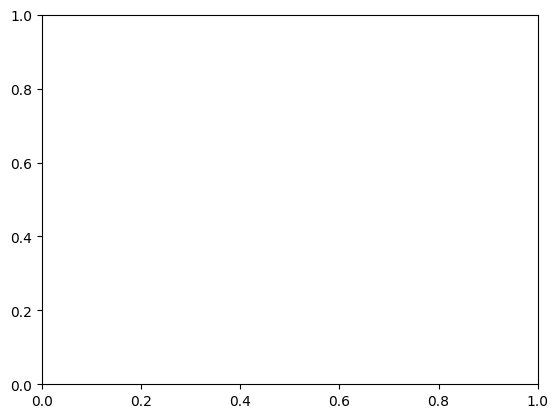

In [8]:
# Lets graph the nasal saccades
fig, ax = plt.subplots()
for saccade in nasal_xsaccades:
    ax.plot(saccade)
    plt.title("All nasal saccades")
    



#CM code 

#graph the temporal saccades
fig, ax = plt.subplots()
for saccade in temporal_xsaccades:
    ax.plot(saccade)
    plt.title("All temporal saccades")

#graph nasal waveforms
fig, ax = plt.subplots()
for saccade in nasal_waveforms:
    ax.plot(saccade)
    plt.title("Nasal waveforms")

#graph temporal waveforms
fig, ax = plt.subplots()
for saccade in temporal_waveforms:
    ax.plot(saccade)
    plt.title("Temporal waveforms")
    
#graph nasal epochs
fig, ax = plt.subplots()
ax.hist(np.diff(nasal_epochs, axis=1), bins=20)
plt.title("Nasal epochs")

#graph temporal epochs
fig, ax = plt.subplots()
ax.hist(np.diff(temporal_epochs, axis=1), bins=20)
plt.title("Temporal epochs")

